<b><center>Principal Component Analysis

This notebook focuses on performing PCA for the data. 

In [1]:
### Imports
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import plotly
import plotly.express as px

from sklearn import decomposition

from numpy import savetxt

<b><center>Understanding the Data

In [2]:
### Load the Data
trainX = pd.read_csv('train_data_z.csv', delimiter = ',', header = 0)
testX = pd.read_csv('test_data_z.csv', delimiter = ',', header = 0)
trainY = pd.read_csv('train_target.csv', delimiter = ',', header = 0)
testY = pd.read_csv('test_target.csv', delimiter = ',', header = 0)

In [3]:
###Look at the loaded data
trainX.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,0,3.518773,-0.389060,-0.390599,-0.392137,-0.355213,-0.392137,-0.293672,-0.391829,-0.044432,-0.370598,-0.345982,0.977143,-0.349059,-0.392137,-0.389060
1,1,3.478740,-0.374512,-0.373483,-0.372454,-0.368337,-0.374512,-0.339520,-0.373071,-0.191318,-0.362162,-0.362162,1.115741,-0.355987,-0.374512,-0.372454
2,2,0.238224,-0.323850,-0.322328,-0.322763,-0.320589,-0.322763,-0.287973,-0.322980,-0.124896,-0.319501,-0.315153,3.703076,-0.311891,-0.323850,-0.322763
3,3,0.724021,-0.358123,-0.357073,-0.358123,-0.344115,-0.358123,-0.330107,-0.357773,-0.107724,-0.356372,-0.333609,3.602736,-0.351119,-0.356372,-0.358123
4,4,2.483225,-0.420429,-0.420769,-0.422129,-0.408529,-0.420429,-0.323527,-0.420769,-0.190925,-0.418729,-0.405129,2.605627,-0.393229,-0.422129,-0.422129


In [4]:
trainY.head()

,Unnamed: 0,price_range
0,565,0
1,1064,1
2,165,3
3,1127,2
4,1091,2


In [5]:
testX.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,0,1.169260,-0.387546,-0.385878,-0.385693,-0.376426,-0.387546,-0.326386,-0.386249,-0.109545,-0.376426,-0.374573,3.452576,-0.352332,-0.385693,-0.387546
1,1,3.124485,-0.439235,-0.429522,-0.435886,-0.435886,-0.435886,-0.325357,-0.438565,0.177047,-0.419139,-0.395693,1.751247,-0.419139,-0.439235,-0.439235
2,2,0.894237,-0.354732,-0.353609,-0.354732,-0.347589,-0.355752,-0.342487,-0.355242,-0.237386,-0.351670,-0.343507,3.558500,-0.344528,-0.355752,-0.355752
3,3,3.274871,-0.430102,-0.431795,-0.433489,-0.419942,-0.433489,-0.281090,-0.431795,0.233677,-0.430102,-0.416555,1.463024,-0.399622,-0.430102,-0.433489
4,4,2.044517,-0.430668,-0.431485,-0.430668,-0.414312,-0.433393,-0.305273,-0.433121,-0.035401,-0.425216,-0.408860,2.957718,-0.389778,-0.430668,-0.433393


In [6]:
testY.head()

,Unnamed: 0,price_range
0,1457,2
1,876,0
2,222,3
3,1068,0
4,1780,0


In [7]:
##There is a row number variable at the front that should be removed
trainX = trainX.drop('Unnamed: 0', axis = 1)
trainY = trainY.drop('Unnamed: 0', axis = 1)
testX = testX.drop('Unnamed: 0', axis = 1)
testY = testY.drop('Unnamed: 0', axis = 1)

In [8]:
#relook at the head of each dataset
trainX.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,3.518773,-0.389060,-0.390599,-0.392137,-0.355213,-0.392137,-0.293672,-0.391829,-0.044432,-0.370598,-0.345982,0.977143,-0.349059,-0.392137,-0.389060
1,3.478740,-0.374512,-0.373483,-0.372454,-0.368337,-0.374512,-0.339520,-0.373071,-0.191318,-0.362162,-0.362162,1.115741,-0.355987,-0.374512,-0.372454
2,0.238224,-0.323850,-0.322328,-0.322763,-0.320589,-0.322763,-0.287973,-0.322980,-0.124896,-0.319501,-0.315153,3.703076,-0.311891,-0.323850,-0.322763
3,0.724021,-0.358123,-0.357073,-0.358123,-0.344115,-0.358123,-0.330107,-0.357773,-0.107724,-0.356372,-0.333609,3.602736,-0.351119,-0.356372,-0.358123
4,2.483225,-0.420429,-0.420769,-0.422129,-0.408529,-0.420429,-0.323527,-0.420769,-0.190925,-0.418729,-0.405129,2.605627,-0.393229,-0.422129,-0.422129


In [9]:
trainY.head()

,price_range
0,0
1,1
2,3
3,2
4,2


In [10]:
testX.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,1.169260,-0.387546,-0.385878,-0.385693,-0.376426,-0.387546,-0.326386,-0.386249,-0.109545,-0.376426,-0.374573,3.452576,-0.352332,-0.385693,-0.387546
1,3.124485,-0.439235,-0.429522,-0.435886,-0.435886,-0.435886,-0.325357,-0.438565,0.177047,-0.419139,-0.395693,1.751247,-0.419139,-0.439235,-0.439235
2,0.894237,-0.354732,-0.353609,-0.354732,-0.347589,-0.355752,-0.342487,-0.355242,-0.237386,-0.351670,-0.343507,3.558500,-0.344528,-0.355752,-0.355752
3,3.274871,-0.430102,-0.431795,-0.433489,-0.419942,-0.433489,-0.281090,-0.431795,0.233677,-0.430102,-0.416555,1.463024,-0.399622,-0.430102,-0.433489
4,2.044517,-0.430668,-0.431485,-0.430668,-0.414312,-0.433393,-0.305273,-0.433121,-0.035401,-0.425216,-0.408860,2.957718,-0.389778,-0.430668,-0.433393


In [11]:
testY.head()

,price_range
0,2
1,0
2,3
3,0
4,0


In [12]:
##Look at the shapes for all datasets
print('TrainX is: ', trainX.shape)
print('TrainY is: ', trainY.shape)
print('TestX is: ', testX.shape)
print('TestY is: ', testY.shape)

TrainX is:  (1600, 15)
TrainY is:  (1600, 1)
TestX is:  (400, 15)
TestY is:  (400, 1)


<b><center>Principal Component Analysis

Now that the data has been looked at and cleaned a little bit, we can now perform principla component analysis. To note, this data is already been normalized and preprocessed as shown in an earlier notebook.

In [13]:
###Perform PCA
pca = decomposition.PCA()
dTrans = pca.fit(trainX).transform(trainX)

In [14]:
#Print the Projected Data
np.set_printoptions(precision=2,suppress=True)
print(dTrans)

[[ 2.49  0.32 -0.07 ...  0.    0.    0.  ]
 [ 2.36  0.24 -0.22 ... -0.   -0.    0.  ]
 [-1.78  0.47  0.05 ...  0.   -0.   -0.  ]
 ...
 [-0.21 -0.19 -0.   ... -0.    0.    0.  ]
 [-0.44 -0.14  0.08 ... -0.    0.    0.  ]
 [ 2.85  0.57 -0.25 ... -0.    0.    0.  ]]


In [15]:
#Print the Explained Varince
print(pca.explained_variance_ratio_)

[0.96 0.03 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


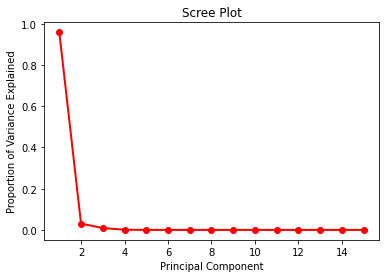

In [16]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Based on the information presented above, 96% of the variance in the data can be explained with the first principal component and 99% of the variance in the data can be explained with two principal components. We will explore both options in our models. 

<b><center>Principal Component Analysis with One Component

Now, PCA will be run on both the training and test sets and by keeping one component. 

In [17]:
## Run PCA again with keeping on 1 component - Training Data
pca_train1 = decomposition.PCA(n_components = 1)
dTrans_train1 = pca_train1.fit(trainX).transform(trainX)

In [18]:
#Print the Projected Data
np.set_printoptions(precision=2,suppress=True)
print(dTrans_train1)

[[ 2.49]
 [ 2.36]
 [-1.78]
 ...
 [-0.21]
 [-0.44]
 [ 2.85]]


In [19]:
#Print the Explained Varince
print(pca_train1.explained_variance_ratio_)

[0.96]


Convert the test data as well.

In [20]:
## Run PCA again with keeping on 1 component - Testing Data
pca_test1 = decomposition.PCA(n_components = 1)
dTrans_test1 = pca_test1.fit(testX).transform(testX)

In [21]:
#Print the Projected Data
np.set_printoptions(precision=2,suppress=True)
print(dTrans_test1)

[[-0.89]
 [ 1.71]
 [-1.18]
 [ 2.02]
 [ 0.1 ]
 [-0.07]
 [-1.66]
 [ 1.82]
 [ 0.14]
 [-1.24]
 [-1.08]
 [-1.53]
 [-1.35]
 [ 0.15]
 [ 0.76]
 [-0.88]
 [ 2.82]
 [ 0.36]
 [ 0.  ]
 [-1.33]
 [-1.2 ]
 [ 3.  ]
 [ 2.1 ]
 [-0.45]
 [-1.63]
 [-0.82]
 [ 0.84]
 [ 0.4 ]
 [ 1.92]
 [-0.54]
 [-0.93]
 [-0.49]
 [-0.76]
 [ 2.27]
 [-1.52]
 [-0.16]
 [ 1.31]
 [ 1.27]
 [-1.24]
 [ 1.58]
 [-0.5 ]
 [-1.08]
 [-1.24]
 [ 0.92]
 [ 2.79]
 [-0.12]
 [ 1.36]
 [-0.9 ]
 [-0.19]
 [-0.11]
 [ 1.58]
 [ 2.14]
 [ 0.8 ]
 [-0.47]
 [ 0.52]
 [-0.04]
 [-1.22]
 [ 0.87]
 [-0.14]
 [-1.31]
 [-1.22]
 [-1.61]
 [ 1.67]
 [-1.2 ]
 [-0.61]
 [-0.82]
 [-0.93]
 [ 0.6 ]
 [-1.62]
 [-0.16]
 [ 1.65]
 [-1.05]
 [ 2.31]
 [ 2.47]
 [-0.6 ]
 [-1.47]
 [-1.26]
 [ 0.58]
 [ 0.78]
 [ 0.48]
 [-0.11]
 [ 2.46]
 [-1.35]
 [-0.14]
 [-0.75]
 [-1.32]
 [ 1.63]
 [-1.17]
 [-1.41]
 [-1.58]
 [-1.12]
 [-0.96]
 [ 1.67]
 [-0.64]
 [-1.29]
 [ 1.44]
 [-0.77]
 [-0.72]
 [-0.9 ]
 [ 0.08]
 [ 0.75]
 [ 1.29]
 [ 0.47]
 [ 1.08]
 [-1.07]
 [ 0.24]
 [-0.78]
 [ 0.53]
 [ 0.64]
 [-0.63]
 [-1.42]
 

In [22]:
#Print the Explained Varince
print(pca_test1.explained_variance_ratio_)

[0.96]


This data was saved to a new file to be used later. 

In [23]:
### Save PCA Data
savetxt('train_pca1.csv', dTrans_train1)
savetxt('test_pca1.csv', dTrans_test1)

<b><center>Principal Component Analysis with Two Components

Now we will perform PCA with two components.

In [24]:
## Run PCA again with keeping on 2 component - Training Data
pca_train2 = decomposition.PCA(n_components = 2)
dTrans_train2 = pca_train2.fit(trainX).transform(trainX)

In [25]:
#Print the Projected Data
np.set_printoptions(precision=2,suppress=True)
print(dTrans_train2)

[[ 2.49  0.32]
 [ 2.36  0.24]
 [-1.78  0.47]
 ...
 [-0.21 -0.19]
 [-0.44 -0.14]
 [ 2.85  0.57]]


In [26]:
#Print the Explained Varince
print(pca_train2.explained_variance_ratio_)

[0.96 0.03]


Visualize the Principal Components with labeled price range classes. 

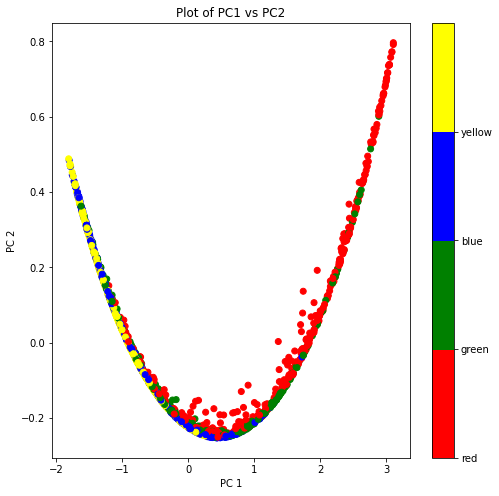

In [27]:
x = dTrans_train2[:,0]
y = dTrans_train2[:,1]
label = np.array(trainY)
colors = ['red','green','blue','yellow']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Plot of PC1 vs PC2')

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

Convert the test data as well. 

In [28]:
## Run PCA again with keeping on 1 component - Testing Data
pca_test2 = decomposition.PCA(n_components = 2)
dTrans_test2 = pca_test2.fit(testX).transform(testX)

In [29]:
#Print the Projected Data
np.set_printoptions(precision=2,suppress=True)
print(dTrans_test2)

[[-0.89  0.  ]
 [ 1.71 -0.  ]
 [-1.18  0.11]
 [ 2.02  0.13]
 [ 0.1  -0.22]
 [-0.07 -0.2 ]
 [-1.66  0.37]
 [ 1.82  0.  ]
 [ 0.14 -0.24]
 [-1.24  0.14]
 [-1.08  0.06]
 [-1.53  0.3 ]
 [-1.35  0.21]
 [ 0.15 -0.24]
 [ 0.76 -0.24]
 [-0.88 -0.01]
 [ 2.82  0.56]
 [ 0.36 -0.25]
 [ 0.   -0.22]
 [-1.33  0.18]
 [-1.2   0.13]
 [ 3.    0.72]
 [ 2.1   0.13]
 [-0.45 -0.15]
 [-1.63  0.36]
 [-0.82 -0.04]
 [ 0.84 -0.22]
 [ 0.4  -0.24]
 [ 1.92  0.04]
 [-0.54 -0.12]
 [-0.93  0.  ]
 [-0.49 -0.14]
 [-0.76 -0.06]
 [ 2.27  0.23]
 [-1.52  0.29]
 [-0.16 -0.2 ]
 [ 1.31 -0.16]
 [ 1.27 -0.16]
 [-1.24  0.13]
 [ 1.58 -0.08]
 [-0.5  -0.08]
 [-1.08  0.07]
 [-1.24  0.15]
 [ 0.92 -0.23]
 [ 2.79  0.54]
 [-0.12 -0.19]
 [ 1.36 -0.14]
 [-0.9  -0.  ]
 [-0.19 -0.2 ]
 [-0.11 -0.21]
 [ 1.58 -0.09]
 [ 2.14  0.14]
 [ 0.8  -0.22]
 [-0.47 -0.13]
 [ 0.52 -0.25]
 [-0.04 -0.22]
 [-1.22  0.14]
 [ 0.87 -0.22]
 [-0.14 -0.2 ]
 [-1.31  0.19]
 [-1.22  0.13]
 [-1.61  0.35]
 [ 1.67 -0.04]
 [-1.2   0.13]
 [-0.61 -0.1 ]
 [-0.82 -0.04]
 [-0.93  0

In [30]:
#Print the Explained Varince
print(pca_test2.explained_variance_ratio_)

[0.96 0.03]


In [31]:
### Save PCA Data
savetxt('train_pca2.csv', dTrans_train2)
savetxt('test_pca2.csv', dTrans_test2)